In [50]:
# Herzlich willkommen zu einem neuen Jupyter Notebook von 'The Erium Podcast'. Dieses Mal widmen wir uns dem Thema 
# 'Anomaly Detection'. Im Folgenden seht ihr nun 2 Datenanalysen mit Datasets in denen Anomalien auftreten. Wir
# finden sie auf und untersuchen den einfluss auf unsere Analyse.
# Dieses Dokument ist ein kleines add on zu der Folge "ANOMALY DETECTION" von The Erium Podcast.
# Solltet ihr die Folge noch nicht gehört haben, tut das am besten direkt unter theeriumpodcast.de, auf Spotify oder 
# Apple Podcasts. So wird deutlicher was gleich hier passiert.
# Aber nun genug davon und ran an die Analysen.
# Zunächst importieren wir die nötigen Bibliotheken.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# 1. Outlier und Lineare Regression:

# Im folgenden betrechten wir einen Dataframe mit Daten zur Niederschlagsmenge
# in China und ihren Einfluss auf die Menge an Reis die dadurch geerntet wurde:
df1 = pd.read_csv('rain_and_rice.csv')
df1.head()


Unnamed: 0  year  amount_of_rain_(mm)  amount_of_rice_harvested_(10^6 tons)
0           0  1900          1008.231548                             66.280768
1           1  1901          1918.198846                            100.539415
2           2  1902          1623.523804                            103.513257
3           3  1903          3552.919486                            151.570254
4           4  1904          2040.781028                            105.502866

In [52]:
df1 = df1.drop(['Unnamed: 0'], axis=1)

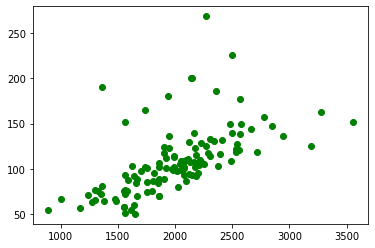

In [53]:
# Um einen Überblick über den Zusammenhang zwischen den Features Regen und Reis
# zu bekommen (den wir hier postulieren!) machen wir zunächst einen Plot:
plt.scatter(df1['amount_of_rain_(mm)'],df1['amount_of_rice_harvested_(10^6 tons)'],color='green')
plt.show()

In [54]:
# Dieser Plot zeigt uns, dass sich hier eine Lineare Regression anbieten würde.
# Jedoch gibt es einige Datenpunkte, die in der Grafik recht weit oben liegen und
# uns so die Regression verhauen können. Wir vergleichen nun also die
# Regression ohne vs. mit Outlierentfernung

In [55]:
# Lineare Regression ohne Outlierentfernung:
coefficients_without = np.polyfit(df1['amount_of_rain_(mm)'],df1['amount_of_rice_harvested_(10^6 tons)'], 1)

# Lineare Regression mit Outlierentfernung:
# Aus der Grafik entnehmen wir, dass im Feature Reis alles über einem Wert von 150 eher unüblich ist.
# Genauer könnte man soetwas auch mit einem Clusteringalgorithmus, z.B. DBSCAN machen.
# Wir entfernen hier der Einfachheit halber lediglich die Punkte aus dem Dataset:
df2 = df1.copy()
df2 = df2[df1['amount_of_rice_harvested_(10^6 tons)'] <= 150]
coefficients_with = np.polyfit(df2['amount_of_rain_(mm)'],df2['amount_of_rice_harvested_(10^6 tons)'], 1)


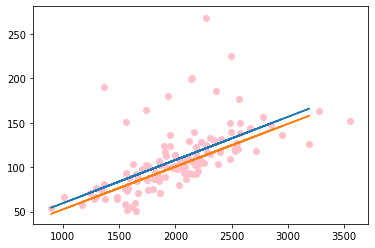

In [56]:
#Schauen wir uns mal im Plot an wo sich diese beiden Regressionen unterscheiden:
y1 = np.polyval(coefficients_without,df2['amount_of_rain_(mm)'])
y2 = np.polyval(coefficients_with,df2['amount_of_rain_(mm)'])

plt.plot(df2['amount_of_rain_(mm)'], y1, df2['amount_of_rain_(mm)'], y2)
plt.scatter(df1['amount_of_rain_(mm)'],df1['amount_of_rice_harvested_(10^6 tons)'],color='pink')
plt.show()

In [57]:
# Hier sehen wir nun, dass die Regression mit Outlierentfernung (orange) signifikant näher an dem Großteil des Datensatzes ist,
# als die ohne (blau). Für eine vertrauenswürdige Vorhersage kann das der entscheidende Unterschied sein.

In [58]:
# 2. Analyse zum Umsatz eines Kleidungsgeschäftes

# Wie immer verschaffen wir uns zunächst einen Überblick über den Dataframe.
df3 = pd.read_csv('clothing_store_sales.csv')
df3.head()

Unnamed: 0  year  month  sales_($)
0           0  2010      1        111
1           1  2010      2        123
2           2  2010      3         56
3           3  2010      4         35
4           4  2010      5         39

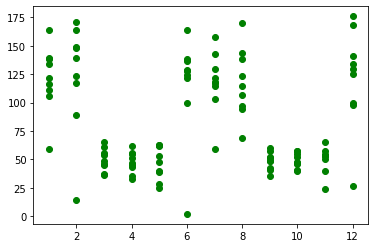

In [59]:
# In dem vorliegenden Dataset wurde dokumentiert wieviel Umsatz im jeweiligen Monat gemaacht wurde. Der folgende Plot soll uns
# zeigen in welchen Bereichen sich der Umsatz je nach Monat bewegt:
plt.scatter(df3['month'],df3['sales_($)'],color='green')

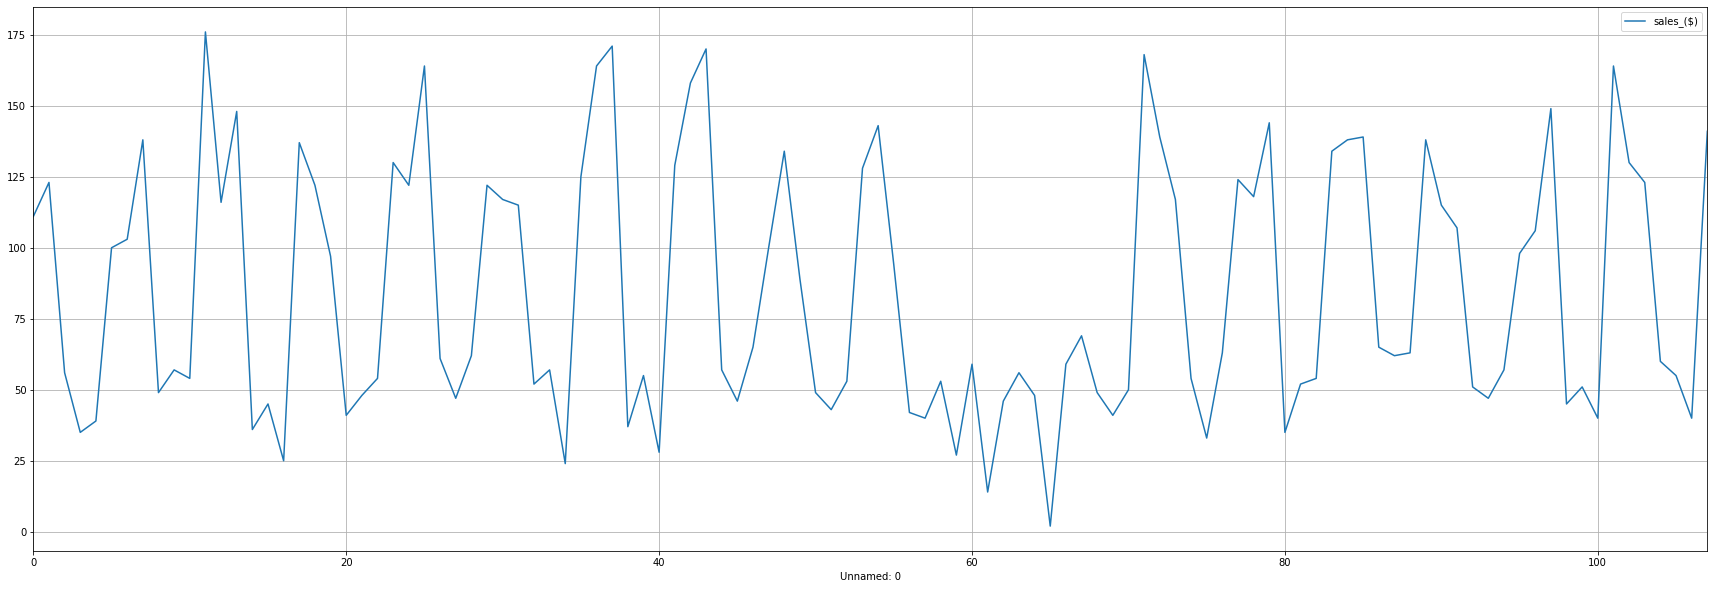

In [60]:
# Wir sehen hier, dass sich gegen Ende und Mitte des Jahres die Umsätze drastisch erhöhen (-> Winter-/Sommerkollektion).
# Dennoch gibt es allerdings ein paar Ausreißer zu diesen Hochzeiten, wie am Scatterplot zu erkennen ist. Um diese genauer benennen
# zu können betrachten wir die Entwicklung des Umsatzes über die Jahre:
df3.plot(x='Unnamed: 0', y=['sales_($)'], figsize=(30,10), grid=True)

In [61]:
# Aha! In den Einträgen 59 bis 67 gibt es also einen Einbruch! Ein genauerer Blick in den Dataframe verrät uns das es sich hierbei
# Um den Jahreswechsel 2014/2015 und den Sommer 2015 handelt. Normalerweise sind das besonders Umsatzstarke Zeiten für das
# Geschäft. Hier sollte man definitiv den Besitzer des Geschäftes/Ersteller des Datasets konsultieren, um herauszufinden
# was hier passiert ist. Dann erst kann die Analyse fundiert fortgesetzt werden, um z.B. Marketigntipps für diese Stoßzeiten
# zu geben.

In [62]:
# Ihr habt eure Analyse anders gemacht, oder habt ein paar Bemerkungen? Dann raus damit!
# Schriebt uns direkt an podcast@erium.de, auf LinkedIn, Facebook, Twitter oder Instagram!

# Danke fürs Anschauen dieser Jupyter Notebook Datei und Hören des Podcasts. Seid auch gespannt auf die nächste Folge von 
# The Erium Podcast in der wir euch alles Wissenswerte zu Data Visualizations erzählen! :D